In [38]:
import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt 

In [39]:
df = pd.read_csv("dynamic_pricing.csv")

In [40]:
df.head()

,Number_of_Riders,Number_of_Drivers,Location_Category,Customer_Loyalty_Status,Number_of_Past_Rides,Average_Ratings,Time_of_Booking,Vehicle_Type,Expected_Ride_Duration,Historical_Cost_of_Ride
0,90,45,Urban,Silver,13,4.47,Night,Premium,90,284.257273
1,58,39,Suburban,Silver,72,4.06,Evening,Economy,43,173.874753
2,42,31,Rural,Silver,0,3.99,Afternoon,Premium,76,329.795469
3,89,28,Rural,Regular,67,4.31,Afternoon,Premium,134,470.201232
4,78,22,Rural,Regular,74,3.77,Afternoon,Economy,149,579.681422


In [41]:
df.describe()

,Number_of_Riders,Number_of_Drivers,Number_of_Past_Rides,Average_Ratings,Expected_Ride_Duration,Historical_Cost_of_Ride
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000
mean,60.372000,27.076000,50.031000,4.257220,99.58800,372.502623
std,23.701506,19.068346,29.313774,0.435781,49.16545,187.158756
min,20.000000,5.000000,0.000000,3.500000,10.00000,25.993449
25%,40.000000,11.000000,25.000000,3.870000,59.75000,221.365202
50%,60.000000,22.000000,51.000000,4.270000,102.00000,362.019426
75%,81.000000,38.000000,75.000000,4.632500,143.00000,510.497504
max,100.000000,89.000000,100.000000,5.000000,180.00000,836.116419


In [42]:
def eda(df, column):
    if df[column].dtype == "object":
        sns.boxplot(data = df  , x = column, y = "Historical_Cost_of_Ride")
        plt.show()

    else:
        sns.scatterplot(data = df, x=column, y = "Historical_Cost_of_Ride")
        plt.show()

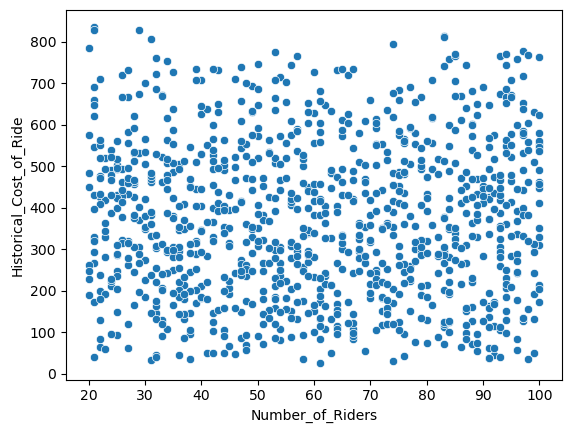

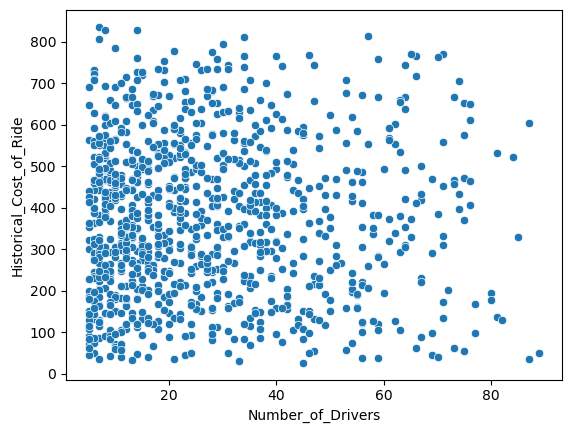

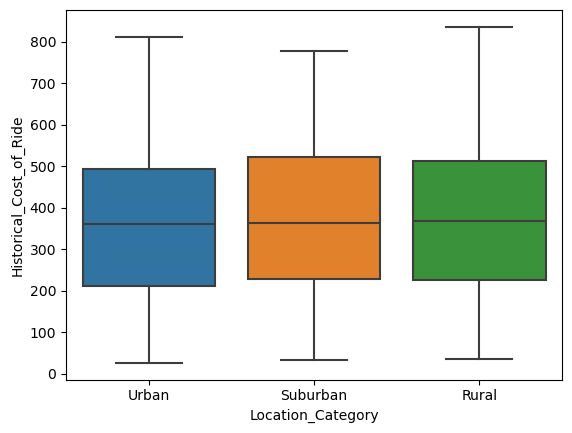

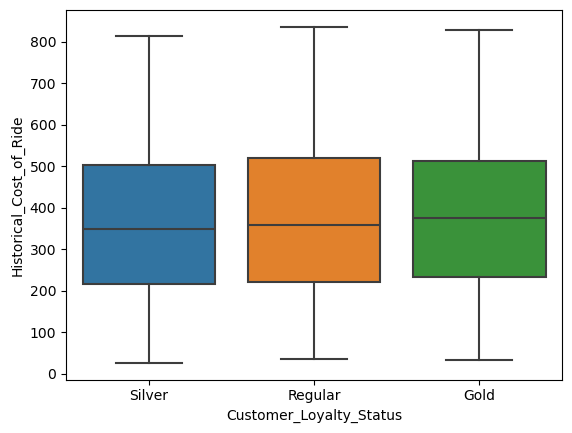

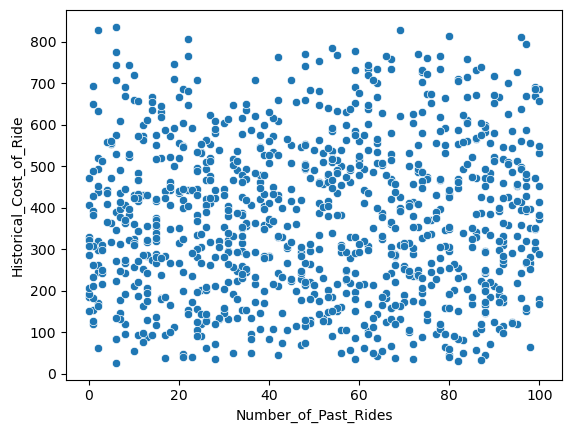

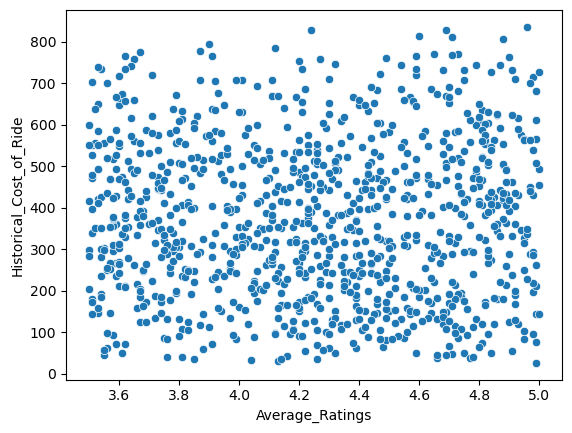

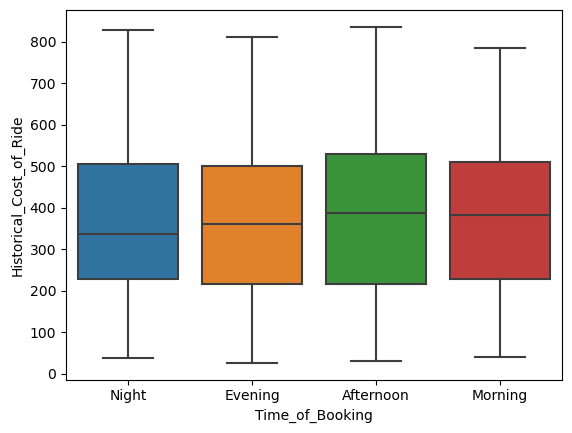

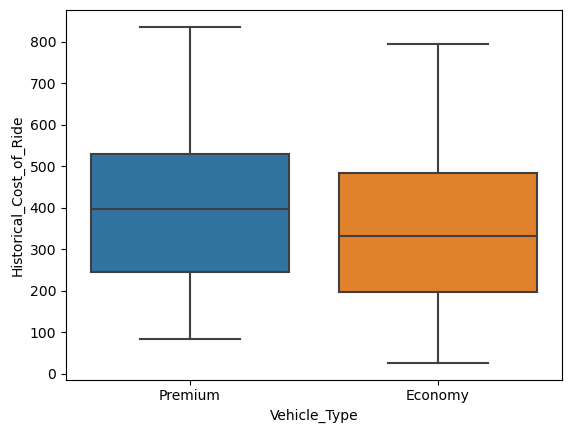

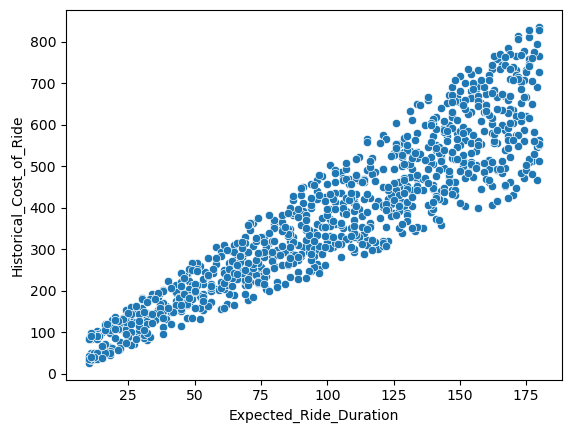

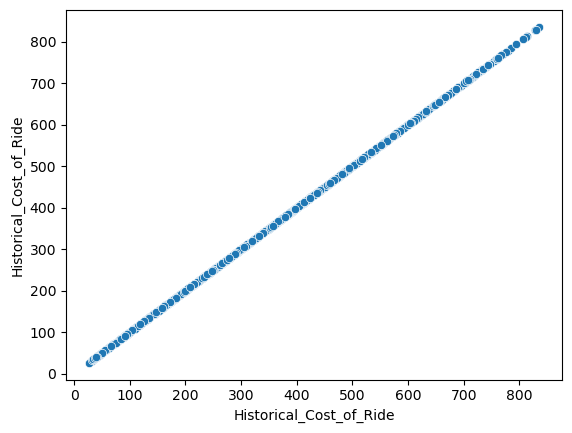

In [43]:
for column in df.columns:
    eda(df,column)

<Axes: >

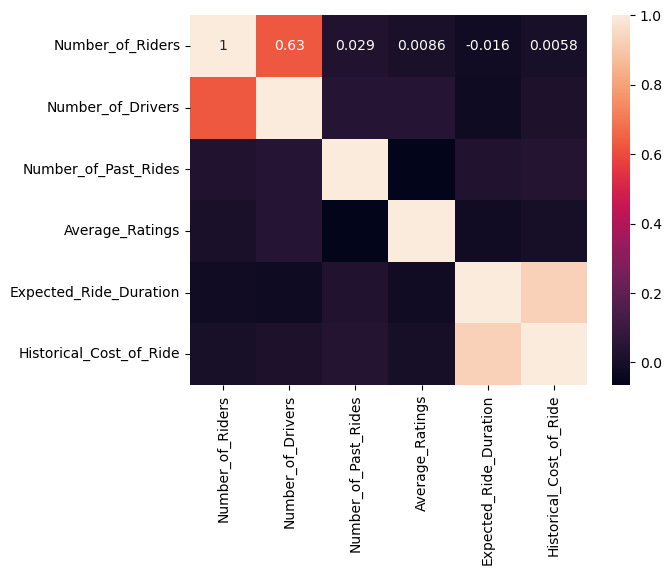

In [44]:
sns.heatmap(df.corr(numeric_only=True),annot=True)

### Feature Engineering

In [45]:
X = df.drop("Historical_Cost_of_Ride", axis=1)
Y = df["Historical_Cost_of_Ride"]

In [46]:
X_new = pd.get_dummies(X, drop_first=True)

In [47]:
X_new

,Number_of_Riders,Number_of_Drivers,Number_of_Past_Rides,Average_Ratings,Expected_Ride_Duration,Location_Category_Suburban,Location_Category_Urban,Customer_Loyalty_Status_Regular,Customer_Loyalty_Status_Silver,Time_of_Booking_Evening,Time_of_Booking_Morning,Time_of_Booking_Night,Vehicle_Type_Premium
0,90,45,13,4.47,90,False,True,False,True,False,False,True,True
1,58,39,72,4.06,43,True,False,False,True,True,False,False,False
2,42,31,0,3.99,76,False,False,False,True,False,False,False,True
3,89,28,67,4.31,134,False,False,True,False,False,False,False,True
4,78,22,74,3.77,149,False,False,True,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,33,23,24,4.21,11,False,True,False,False,False,True,False,True
996,84,29,92,4.55,94,False,True,True,False,False,True,False,True
997,44,6,80,4.13,40,True,False,False,False,False,False,True,True
998,53,27,78,3.63,58,True,False,True,False,False,False,True,True


In [48]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_scaled = scaler.fit_transform(X_new)

In [49]:
X_scaled

array([[ 1.25067265,  0.94045748, -1.26389491, ..., -0.57119169,
         1.61962601,  0.95692675],
       [-0.10012811,  0.62564243,  0.74981791, ..., -0.57119169,
        -0.61742649, -1.04501206],
       [-0.77552849,  0.20588904, -1.70759434, ..., -0.57119169,
        -0.61742649,  0.95692675],
       ...,
       [-0.69110344, -1.10584031,  1.02286372, ..., -0.57119169,
         1.61962601,  0.95692675],
       [-0.31119072, -0.00398766,  0.95460227, ..., -0.57119169,
         1.61962601,  0.95692675],
       [ 0.74412237,  1.88490261, -1.22976418, ..., -0.57119169,
        -0.61742649, -1.04501206]])

### Train-Test Split

In [50]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test  = train_test_split(X_scaled,Y,test_size=0.2,random_state=101)

In [51]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor()

model.fit(X_train, Y_train)

RandomForestRegressor()

### Model Training and Error Evaluation

In [52]:
y_pred= model.predict(X_test)

In [53]:
from sklearn.metrics import mean_squared_error,mean_absolute_percentage_error

mse = mean_squared_error(Y_test, y_pred)
mape = 100* mean_absolute_percentage_error(Y_test,y_pred)

In [54]:
mse

5015.64739928771

In [ ]:
mape

14.072780599216712

### Feature Importance

In [56]:
feature_imp = model.feature_importances_
feature = X_new.columns

In [58]:
imp_df = pd.DataFrame({'Feature':feature, "Importance": feature_imp})

In [59]:
imp_df.sort_values("Importance",ascending=False)

,Feature,Importance
4,Expected_Ride_Duration,0.880893
3,Average_Ratings,0.023790
1,Number_of_Drivers,0.021530
2,Number_of_Past_Rides,0.020823
0,Number_of_Riders,0.019119
12,Vehicle_Type_Premium,0.014167
7,Customer_Loyalty_Status_Regular,0.003166
11,Time_of_Booking_Night,0.003130
6,Location_Category_Urban,0.003128
5,Location_Category_Suburban,0.002786


<BarContainer object of 13 artists>

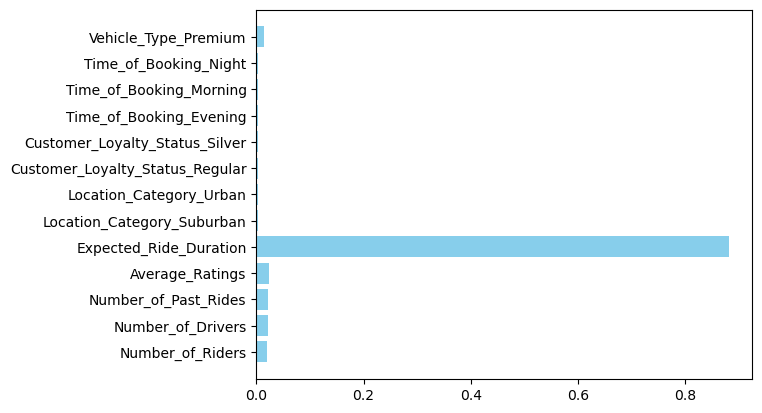

In [60]:
plt.barh(imp_df['Feature'],imp_df["Importance"],color='skyblue')